In [162]:
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
cleaned_hm = "happydb/data/cleaned_hm.csv"
demographic_data = "happydb/data/demographic.csv"

In [164]:
#read the cleaned data
cleaned_dataset = pd.read_csv(cleaned_hm)
worker_data = pd.read_csv(demographic_data)
#join the happiness data with workers data
dataset = pd.merge(cleaned_dataset, worker_data, on='wid', how='inner')

In [165]:
categories = dataset.predicted_category.unique()

In [166]:
#remove nonsensical age values
def convert_to_int(val):
    v = str(val).split('.')[0]
    if len(v) > 2:
        return None
    return v

dataset['age'] = dataset['age'].apply(convert_to_int)


In [167]:
#get counts for the happiness category in every age possible
df2 = dataset[['age', 'predicted_category','wid']].groupby(['age', 'predicted_category'], as_index=False).agg('count')

In [168]:
#find out what happiness category is the maximum erason for a certain age
df3 = df2.groupby(['age'], as_index=False)['wid'].max()
df4 = pd.merge(df2, df3, on=['age','wid'], how='inner')

In [169]:
df4

,age,predicted_category,wid
0,17,achievement,3
1,18,achievement,210
2,19,achievement,428
3,2,affection,7
4,20,achievement,540
5,21,achievement,975
6,22,achievement,1175
7,23,achievement,1618
8,24,achievement,1618
9,25,achievement,2066


In [170]:
#converting required values to list
ageList = df4['age'].tolist()
category_list = df4['predicted_category'].tolist()

In [171]:
#create a dictionary for labels
d = {v:k+2 for k,v in enumerate(categories)}
d

{'achievement': 5,
 'affection': 2,
 'bonding': 4,
 'enjoy_the_moment': 6,
 'exercise': 7,
 'leisure': 3,
 'nature': 8}

In [172]:
categoryList = [d[cat] for cat in category_list]

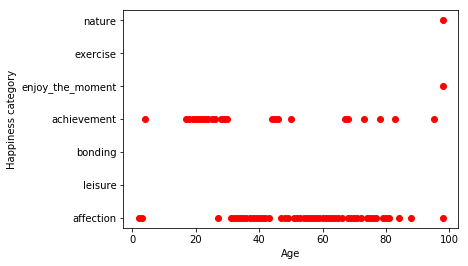

In [173]:
#plot the graph
plt.xlabel("Age")
plt.ylabel("Happiness category")
plt.yticks(d.values(), d.keys())
plt.plot(ageList, categoryList, 'ro')
plt.show()

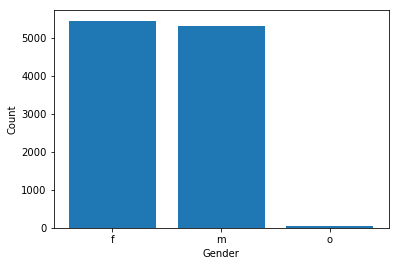

In [193]:
#Showing that the number of male and female involved is almost same
df6 = worker_data.groupby(['gender'], as_index=False)['wid'].count()
d = {'f':1,'m':2,'o':3}
gender = df6['gender'].tolist()
genderCount = df6['wid'].tolist()
gender = [d[g] for g in gender]

plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(d.values(), d.keys())
plt.bar(gender, genderCount)
plt.show()

In [213]:
df7 = dataset.groupby(['predicted_category', 'gender'], as_index=False)['wid'].count()

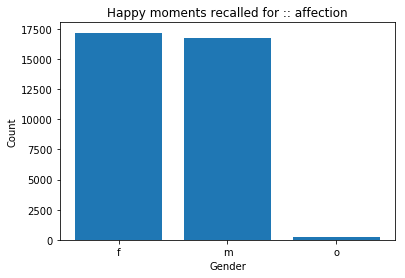

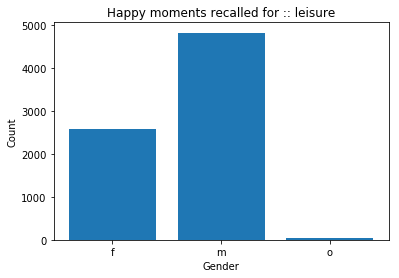

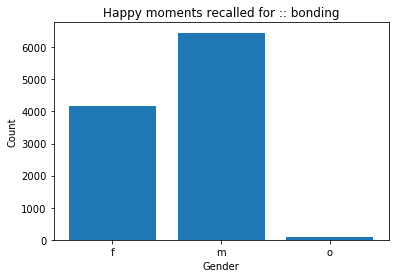

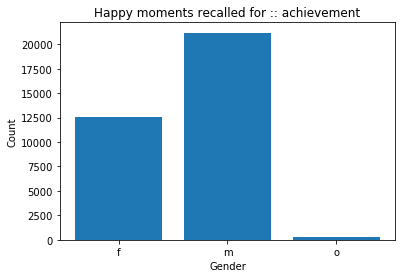

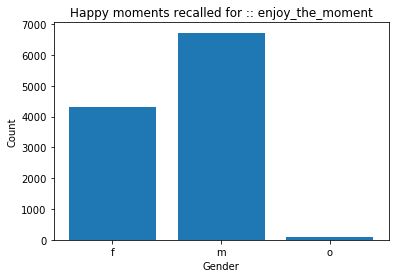

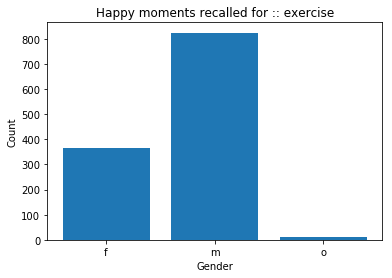

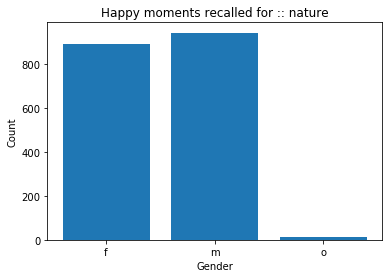

In [212]:
# We have established that there are almost equal number of men and women asked to fill up this dataset.
# Checking for each happiness category, who recalls more instances. This gives us an indication for what 
# activities make a man or a woman happy

for c in categories:
    df = df7.where(df7['predicted_category'] == c).dropna()

    gender = df['gender'].tolist()
    genderCount = df['wid'].tolist()
    gender = [d[g] for g in gender]

    plt.title("Happy moments recalled for :: " + c)
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.xticks(d.values(), d.keys())
    plt.bar(gender, genderCount)
    plt.show()